# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset: Bank Transaction Dataset for Fraud Detection

Link : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.calibration import LabelEncoder
import matplotlib.cm as cm
from scipy import stats




# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
#Type your code here
df = pd.read_csv('bank_transactions_data_2.csv')



## Fitur Utama (Key Features) dalam Dataset Transaksi Bank
1. TransactionID: Identifikasi unik alfanumerik untuk setiap transaksi.
2. AccountID: Identifikasi unik untuk setiap akun, dengan beberapa transaksi per akun.
3. TransactionAmount: Nilai moneter dari setiap transaksi, mulai dari pengeluaran kecil hingga pembelian besar.
4. TransactionDate: Waktu transaksi yang mencakup tanggal dan jam.
5. TransactionType: Kategori transaksi yang menunjukkan apakah itu 'Credit' (kredit) atau 'Debit' (debit).
6. Location: Lokasi geografis tempat transaksi terjadi, direpresentasikan dengan nama kota di AS.
7. DeviceID: Identifikasi alfanumerik perangkat yang digunakan untuk melakukan transaksi.
8. IP Address: Alamat IPv4 yang terkait dengan transaksi, yang kadang berubah untuk beberapa akun.
9. MerchantID: Identifikasi unik untuk pedagang, menunjukkan pedagang yang sering digunakan dan yang tidak biasa untuk  setiap akun.
10. AccountBalance: Saldo dalam akun setelah transaksi, dengan korelasi logis berdasarkan tipe dan jumlah transaksi.
11. PreviousTransactionDate: Waktu transaksi terakhir dari akun tersebut, membantu menghitung frekuensi transaksi.
12. Channel: Kanal yang digunakan untuk melakukan transaksi (misalnya Online, ATM, Branch).
13. CustomerAge: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
14. CustomerOccupation: Pekerjaan pemegang akun (misalnya Dokter, Insinyur, Mahasiswa, Pensiunan), mencerminkan pola pendapatan.
15. TransactionDuration: Durasi transaksi dalam detik, bervariasi tergantung tipe transaksi.
16. LoginAttempts: Jumlah percobaan login sebelum transaksi, dengan nilai tinggi yang dapat mengindikasikan anomali.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# STRUKTUR DATA beserta dengan tipe-tipe data
df.describe()
print("Dataset Shape:", df.shape)
print("\nSample Data:")
display(df.head())
print("\nData Info:")
display(df.info())

display(df.dtypes)

Dataset Shape: (2512, 16)

Sample Data:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalan

None

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

1. Identifikasi Transaksi & Akun
TransactionID (object) → ID unik untuk setiap transaksi.
AccountID (object) → ID unik untuk setiap akun, satu akun bisa memiliki banyak transaksi.

2. Detail Transaksi
- TransactionAmount (float64) → Jumlah uang dalam transaksi (misalnya $10.50 atau Rp150.000).
- TransactionDate (datetime64[ns]) → Waktu transaksi dilakukan dalam format timestamp.
- TransactionType (object) → Jenis transaksi, misalnya "Credit" (pemasukan) atau "Debit" (pengeluaran).
- Location (object) → Lokasi geografis transaksi (misalnya nama kota atau negara bagian).
- DeviceID (object) → ID unik dari perangkat yang digunakan untuk transaksi (misalnya HP atau laptop).
- IP Address (object) → Alamat IP dari koneksi internet saat transaksi dilakukan.
- MerchantID (object) → ID unik untuk merchant tempat transaksi dilakukan.
- Channel (object) → Saluran yang digunakan untuk transaksi, misalnya Online, ATM, atau Branch.
3. Informasi Pengguna
- CustomerAge (int64) → Umur pemilik akun dalam tahun.
- CustomerOccupation (object) → Pekerjaan pemilik akun (misalnya "Dokter", "Mahasiswa", "Pensiunan").
4. Waktu & Perilaku Transaksi
- TransactionDuration (int64) → Lama waktu transaksi dalam detik.
- LoginAttempts (int64) → Jumlah percobaan login sebelum transaksi dilakukan.
- AccountBalance (float64) → Saldo akun setelah transaksi selesai.
- PreviousTransactionDate (datetime64[ns]) → Tanggal transaksi sebelumnya untuk akun tersebut.

5. Waktu (Engineered Features)
Fitur ini dibuat berdasarkan TransactionDate untuk analisis tren waktu:

year (int32) → Tahun transaksi terjadi.
month (int32) → Bulan transaksi terjadi.
day (int32) → Hari dalam bulan transaksi terjadi.
day_of_week (int32) → Hari dalam seminggu transaksi terjadi (misalnya 0 = Senin, 6 = Minggu).


In [6]:
# 2. Penanganan Data yang Hilang

#Cek nilai hilang
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)})
    
print("\n Nilai hilang: ")
display(missing_df[missing_df['Missing Values'] >= 0])

    


 Nilai hilang: 


,Missing Values,Percentage
TransactionID,0,0.0
AccountID,0,0.0
TransactionAmount,0,0.0
TransactionDate,0,0.0
TransactionType,0,0.0
Location,0,0.0
DeviceID,0,0.0
IP Address,0,0.0
MerchantID,0,0.0
Channel,0,0.0


In [7]:
#Periksa Data Duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat (semua kolom sama): {duplicate_rows}")


if duplicate_rows > 0:
    print("\nContoh Data Duplikat:")
    duplicate_df = df[df.duplicated(keep='first')]
    display(duplicate_df.head())

Jumlah baris duplikat (semua kolom sama): 0


Tidak ada Data yang Missing. 


Distribusi Data:

Distribusi Variabel Numerik:


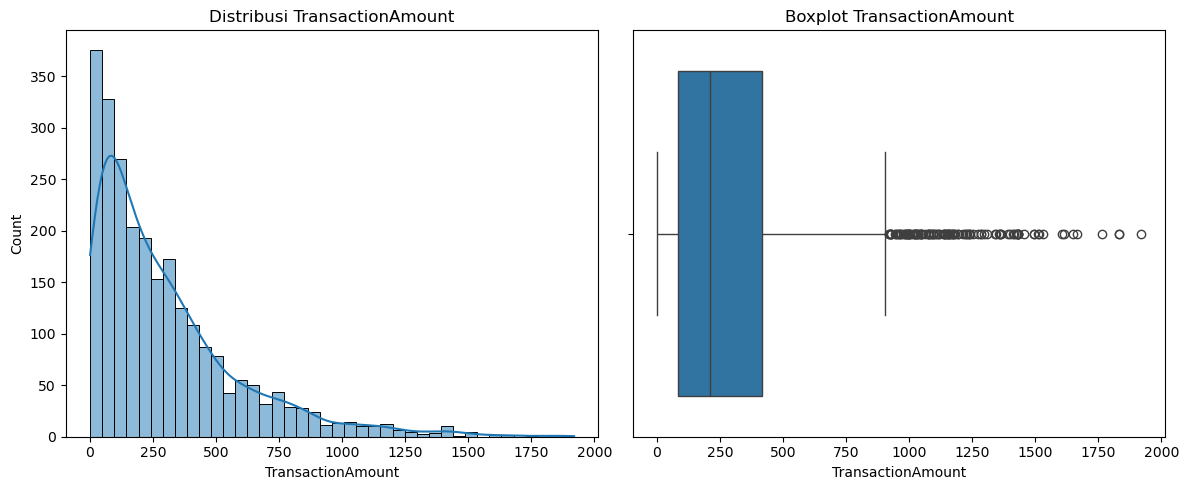


Statistik Deskriptif untuk TransactionAmount:


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.0,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11


Jumlah outlier pada TransactionAmount: 113
------------------------------


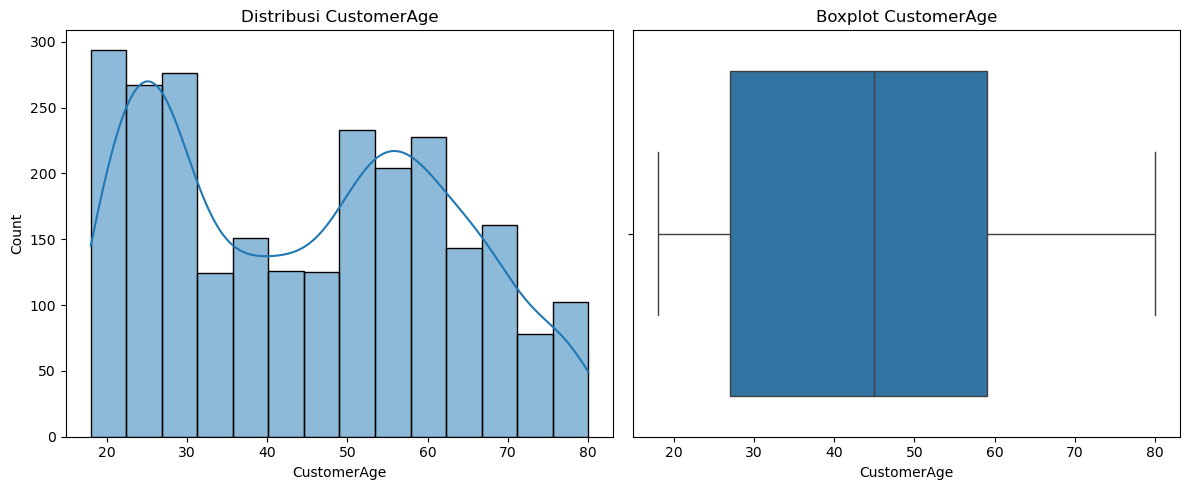


Statistik Deskriptif untuk CustomerAge:


,count,mean,std,min,25%,50%,75%,max
CustomerAge,2512.0,44.673965,17.792198,18.0,27.0,45.0,59.0,80.0


Jumlah outlier pada CustomerAge: 0
------------------------------


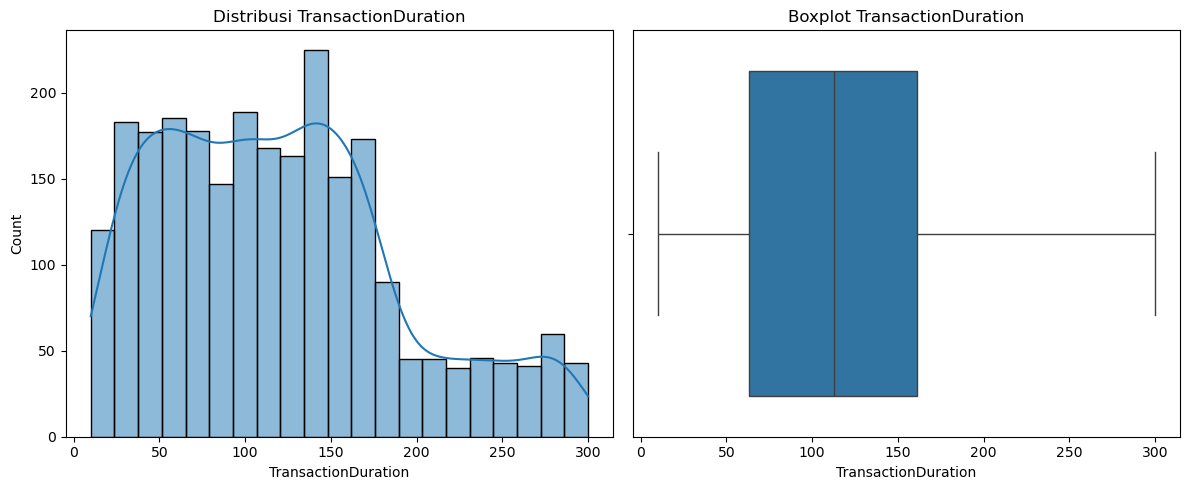


Statistik Deskriptif untuk TransactionDuration:


,count,mean,std,min,25%,50%,75%,max
TransactionDuration,2512.0,119.643312,69.963757,10.0,63.0,112.5,161.0,300.0


Jumlah outlier pada TransactionDuration: 0
------------------------------


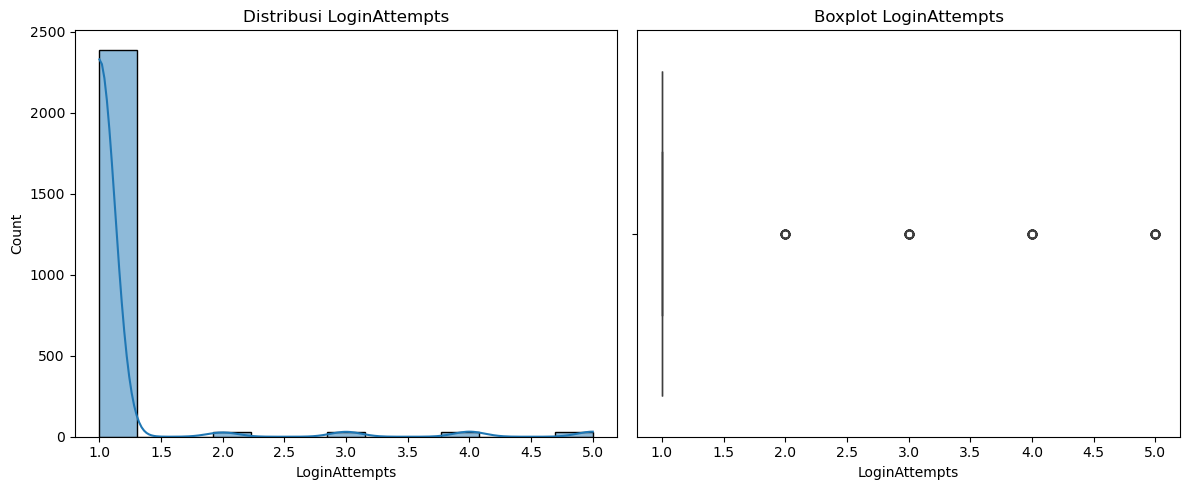


Statistik Deskriptif untuk LoginAttempts:


,count,mean,std,min,25%,50%,75%,max
LoginAttempts,2512.0,1.124602,0.602662,1.0,1.0,1.0,1.0,5.0


Jumlah outlier pada LoginAttempts: 122
------------------------------


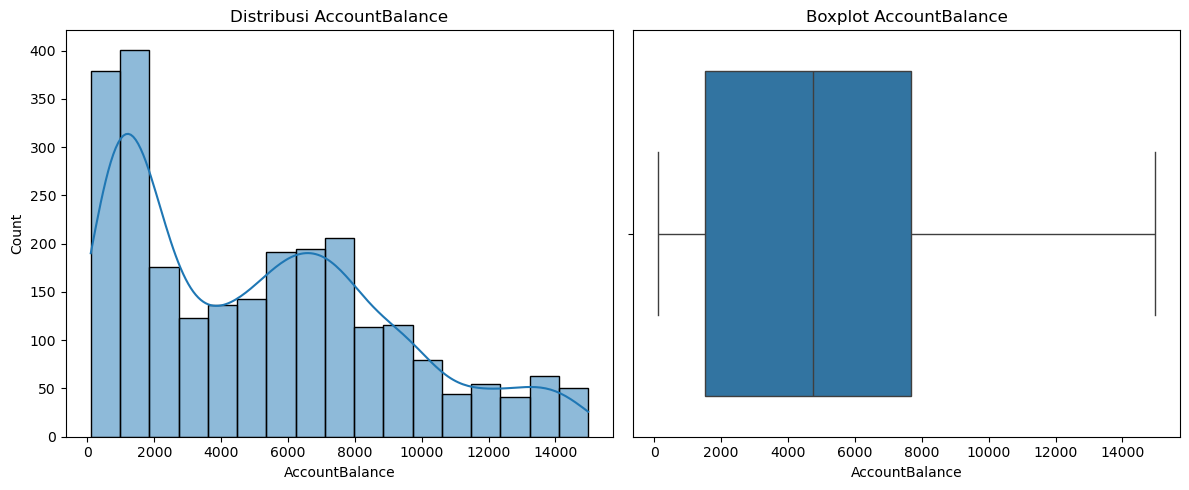


Statistik Deskriptif untuk AccountBalance:


,count,mean,std,min,25%,50%,75%,max
AccountBalance,2512.0,5114.302966,3900.942499,101.25,1504.37,4735.51,7678.82,14977.99


Jumlah outlier pada AccountBalance: 0
------------------------------


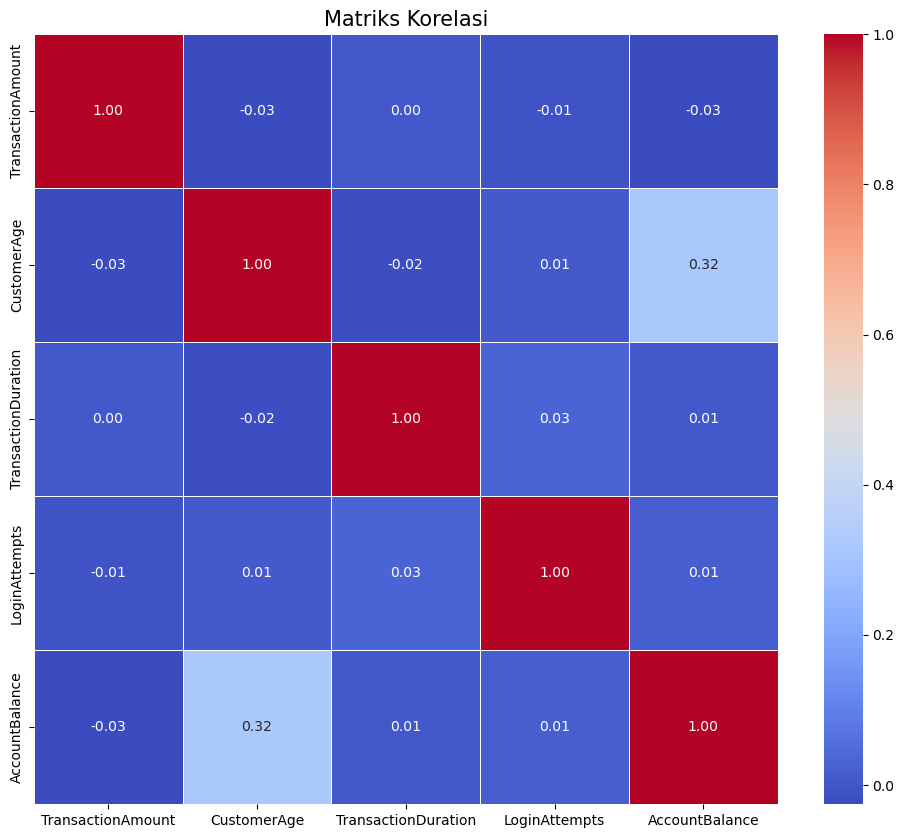

In [8]:
# 4. Analisis Distribusi dan Korelasi

print("\nDistribusi Data:")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nDistribusi Variabel Numerik:")
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Statistik deskriptif untuk kolom numerik
    print(f"\nStatistik Deskriptif untuk {col}:")
    stats = df[col].describe()
    display(pd.DataFrame(stats).T)
    
    # Deteksi outlier menggunakan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    print(f"Jumlah outlier pada {col}: {len(outliers)}")
    print("-" * 30)

# Analisis korelasi untuk variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi', fontsize=15)
plt.show()

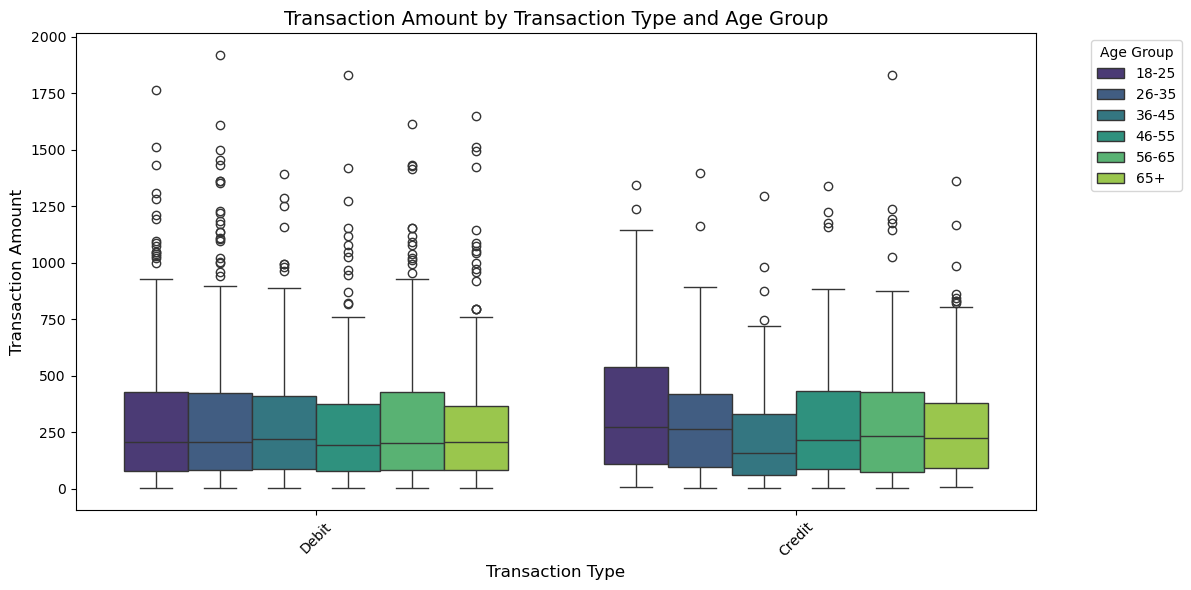

In [9]:
# Buat Grup Umur
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[18, 25, 35, 45, 55, 65, 100], 
                        labels=["18-25", "26-35", "36-45", "46-55", "56-65", "65+"])

# Visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="TransactionType", y="TransactionAmount", hue="AgeGroup", palette="viridis")
plt.title("Transaction Amount by Transaction Type and Age Group", fontsize=14, color='#000000')
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

### INSIGHT YANG DITEMUKAN ### 

1. TransactionAmount:
Beberapa transaksi terdapat 112 outliers yang kemungkinan antara anomali atau transaksi besar yang normal.
2. CustomerAge:
Jarak Angka antara 18 - 80, sisanya tidak ada outlier.
3. TransactionDuration:
Beberapa transaksi terdapat transaksi yang berlangsung selama 5 menit, kemungkinan transaksi aktifitas yang tidak normal. Namun tidak terdeteksi outlier secara angka.
4. LoginAttempts:
Majoritas Login hanya melakukan sekali tetapi ketika diatas sampai 5 kali, outlier ini masuk akal dikarenakan ada asumsi sistem dari bank hanya bisa melakukan percobaan login maksimal 5 kali.
5. AccountBalance:
Beberapa akun memiliki angka yang diatas rata-rata maksimal $14.977 USD

Korelasi Signifikan
CustomerAge vs. AccountBalance (0.32)
Terdapat korelasi positif yang cukup berarti antara usia pelanggan dan saldo akun.
Semakin tua pelanggan, semakin tinggi saldo akunnya.
Bisa jadi ini karena pelanggan yang lebih tua cenderung memiliki keuangan lebih stabil.

Sisa Korelasi lain tidak terlalu signifikan dalam mepengaruhi nilai antar variabel

TIDAK TERDAPAT DATA DUPLIKAT ATAU MISSING VALUES



    

#

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Type your code here

# DIKARENAKAN TIDAK MEMILIKI MISSING VALUES DAN DATA DUPLIKAT MAKA TIDAK PERLU PENANGANAN DATA LEBIH LANJUT

# OUTLIER MASIH AMBIGU DAN TIDAK JELAS, SEHINGGA TIDAK PERLU DITANGANI 

In [1]:
from scipy import stats
# Salin DataFrame untuk preprocessing
df_clean = df.copy()

# 1. Visualisasi dan Transformasi Transaction Amount 
plt.figure(figsize=(15, 10))

# Visualisasi distribusi sebelum transformasi
plt.subplot(2, 2, 1)
sns.histplot(df_clean['TransactionAmount'], kde=True)
plt.title('TransactionAmount (Asli)')

# Transformasi Log karena Data Miring ke Kanan (Right Skewed)
df_clean['TransactionAmount'] = np.log1p(df_clean['TransactionAmount'])

# Visualisasi distribusi setelah transformasi
plt.subplot(2, 2, 2)
sns.histplot(df_clean['TransactionAmount'], kde=True)
plt.title('TransactionAmount (Setelah Transformasi Log)')

plt.tight_layout()
plt.show()

# 2. ENCODING DASAR DAN KONVERSI TANGGAL
# Label Encoding untuk Tipe Transaksi
df_clean['TransactionType'] = df_clean['TransactionType'].map({'Debit': 0, 'Credit': 1})

# Transformasi Tanggal Transaksi
df_clean['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df_clean['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

print("Informasi kolom tanggal:")
df_clean[['TransactionDate', 'PreviousTransactionDate']].info()




NameError: name 'df' is not defined

In [12]:
# 3. REKAYASA FITUR DAN PREPROCESSING LANJUTAN
# Buat salinan untuk preprocessing khusus clustering
df_cluster = df_clean.copy()

# Simpan nilai TransactionAmount asli jika diperlukan untuk referensi
df_cluster['TransactionAmount_Original'] = np.expm1(df_cluster['TransactionAmount'])

# TIME-BASED FEATURES
# Hitung selisih waktu antara transaksi saat ini dengan transaksi sebelumnya (dalam detik)
df_cluster['TimeSinceLastTransaction'] = (df_cluster['TransactionDate'] - df_cluster['PreviousTransactionDate']).dt.total_seconds()
# Isi nilai NaN dengan median
median_time = df_cluster['TimeSinceLastTransaction'].median()
df_cluster['TimeSinceLastTransaction'] = df_cluster['TimeSinceLastTransaction'].fillna(median_time)

# Ekstrak jam dari waktu transaksi
df_cluster['TransactionHour'] = df_cluster['TransactionDate'].dt.hour

# TRANSACTION FREQUENCY
# Hitung jumlah total transaksi per akun
transaction_frequency = df_cluster.groupby('AccountID').size().reset_index(name='TransactionFrequency')
df_cluster = df_cluster.merge(transaction_frequency, on='AccountID', how='left')

# DEVICE AND IP USAGE
# Hitung jumlah akun yang menggunakan perangkat yang sama
device_usage = df_cluster.groupby('DeviceID')['AccountID'].nunique().reset_index(name='DeviceUsage')
df_cluster = df_cluster.merge(device_usage, on='DeviceID', how='left')

# Hitung jumlah akun yang menggunakan alamat IP yang sama
ip_usage = df_cluster.groupby('IP Address')['AccountID'].nunique().reset_index(name='IPUsage')
df_cluster = df_cluster.merge(ip_usage, on='IP Address', how='left')

# MERCHANT PREFERENCES
# Hitung jumlah transaksi per akun untuk setiap merchant
merchant_preference = df_cluster.groupby(['AccountID', 'MerchantID']).size().reset_index(name='MerchantPreference')
df_cluster = df_cluster.merge(merchant_preference, on=['AccountID', 'MerchantID'], how='left')

# Buat fitur dari tanggal transaksi (monthly aggregation)
df_cluster['TransactionYearMonth'] = df_cluster['TransactionDate'].dt.to_period('M')
monthly_transactions = df_cluster.groupby(['AccountID', 'TransactionYearMonth'])['TransactionAmount'].sum().reset_index()
df_cluster = df_cluster.merge(monthly_transactions, on=['AccountID', 'TransactionYearMonth'], how='left', suffixes=('', '_MonthlySum'))

# Hitung perubahan saldo
df_cluster['BalanceChange'] = df_clean['AccountBalance'] - df_clean.groupby('AccountID')['AccountBalance'].shift(1)
df_cluster['BalanceChange'] = df_cluster['BalanceChange'].fillna(0)  # Isi NaN dengan 0

# Buat kelompok umur menggunakan nilai asli
df_cluster['CustomerAgeGroup'] = pd.cut(df_clean['CustomerAge'],
                                    bins=[0, 18, 30, 45, 60, 100], 
                                    labels=['<18', 'Muda', 'Dewasa', 'Paruh Baya', 'Senior'])

# Binary encoding untuk TransactionType (sudah dilakukan di preprocessing dasar)
df_cluster['TransactionTypeBinary'] = df_cluster['TransactionType']

# One-Hot Encoding untuk Channel
df_cluster = pd.get_dummies(df_cluster, columns=['Channel'], drop_first=True)

# Label Encoding untuk CustomerOccupation
le = LabelEncoder()
df_cluster['CustomerOccupationEncoded'] = le.fit_transform(df_cluster['CustomerOccupation'])

# Skala fitur numerik (hanya sekali)
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
                      'AccountBalance', 'BalanceChange', 'TimeSinceLastTransaction', 'TransactionHour',
                      'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference']
scaler = MinMaxScaler()
df_cluster[numerical_features] = scaler.fit_transform(df_cluster[numerical_features])

# Penanganan Outlier dengan Z-score
df_cluster['zscore_transaction'] = np.abs(stats.zscore(df_cluster['TransactionAmount']))
print(f"Menghapus {(df_cluster['zscore_transaction'] >= 3).sum()} outlier berdasarkan Z-score")
df_cluster = df_cluster[df_cluster['zscore_transaction'] < 3]  # Hapus outlier dengan Z-score > 3

# Hapus kolom yang tidak diperlukan untuk clustering
df_cluster.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate',
                    'Location', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionType',
                    'CustomerOccupation', 'TransactionYearMonth', 'zscore_transaction', 
                    'TransactionAmount_Original'], inplace=True)

# Reset indeks setelah pembersihan
df_cluster.reset_index(drop=True, inplace=True)

# Tampilkan hasil preprocessing akhir
print("\nDataframe hasil preprocessing untuk clustering:")
print(f"Dimensi: {df_cluster.shape}")
print("\n5 baris pertama:")
display(df_cluster.head())

# Periksa nilai yang hilang
missing_values = df_cluster.isnull().sum()
if missing_values.any():
    print("\nNilai yang hilang dalam data yang telah diproses:")
    print(missing_values[missing_values > 0])
else:
    print("\nTidak ada nilai yang hilang dalam data yang telah diproses.")

Menghapus 18 outlier berdasarkan Z-score

Dataframe hasil preprocessing untuk clustering:
Dimensi: (2494, 19)

5 baris pertama:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,TimeSinceLastTransaction,TransactionHour,TransactionFrequency,DeviceUsage,IPUsage,MerchantPreference,TransactionAmount_MonthlySum,BalanceChange,CustomerAgeGroup,TransactionTypeBinary,Channel_Branch,Channel_Online,CustomerOccupationEncoded
0,0.338779,0.838710,0.244828,0.0,0.336832,65+,0.271964,0.0,0.545455,0.625,0.166667,0.0,6.288342,0.517021,Senior,0,False,False,0
1,0.777971,0.806452,0.451724,0.0,0.918055,65+,0.483469,0.0,0.545455,0.500,0.250000,0.0,12.602900,0.517021,Senior,0,False,False,0
2,0.629737,0.016129,0.158621,0.0,0.068637,18-25,0.519353,1.0,0.272727,0.500,0.416667,0.0,4.846468,0.517021,Muda,0,False,True,3
3,0.681120,0.129032,0.051724,0.0,0.569198,26-35,0.337883,0.0,0.636364,0.625,0.583333,0.0,5.223055,0.517021,Muda,0,False,True,3
4,0.332866,0.129032,0.648276,0.0,0.492591,26-35,0.788463,0.5,0.454545,0.250,0.250000,0.0,2.670694,0.517021,Muda,1,False,True,3



Nilai yang hilang dalam data yang telah diproses:
AgeGroup    56
dtype: int64


Dikarenakan Right-skewed maka dibutuhkan log transformasi.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [13]:


# 1. Identifikasi dan Penanganan Kolom Kategorikal
print("Tipe data di df_cluster:")
print(df_cluster.dtypes)

# Identifikasi kolom kategorikal
categorical_columns = df_cluster.select_dtypes(include=['object', 'category']).columns
print(f"\nKolom kategorikal yang ditemukan: {list(categorical_columns)}")

# Buat dataframe numerik untuk clustering
df_cluster_numeric = df_cluster.select_dtypes(exclude=['object', 'category'])
print(f"\nDataframe untuk clustering setelah menghapus kolom kategorikal:")
print(f"Shape: {df_cluster_numeric.shape}")
print(df_cluster_numeric.columns.tolist())

Tipe data di df_cluster:
TransactionAmount                float64
CustomerAge                      float64
TransactionDuration              float64
LoginAttempts                    float64
AccountBalance                   float64
AgeGroup                        category
TimeSinceLastTransaction         float64
TransactionHour                  float64
TransactionFrequency             float64
DeviceUsage                      float64
IPUsage                          float64
MerchantPreference               float64
TransactionAmount_MonthlySum     float64
BalanceChange                    float64
CustomerAgeGroup                category
TransactionTypeBinary              int64
Channel_Branch                      bool
Channel_Online                      bool
CustomerOccupationEncoded          int32
dtype: object

Kolom kategorikal yang ditemukan: ['AgeGroup', 'CustomerAgeGroup']

Dataframe untuk clustering setelah menghapus kolom kategorikal:
Shape: (2494, 17)
['TransactionAmount', 'Customer

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Untuk n_clusters = 2, silhouette score = 0.553, inertia = 17120
Untuk n_clusters = 3, silhouette score = 0.519, inertia = 11544
Untuk n_clusters = 4, silhouette score = 0.307, inertia = 9724
Untuk n_clusters = 5, silhouette score = 0.298, inertia = 8448
Untuk n_clusters = 6, silhouette score = 0.253, inertia = 7469
Untuk n_clusters = 7, silhouette score = 0.253, inertia = 6737
Untuk n_clusters = 8, silhouette score = 0.236, inertia = 6211
Untuk n_clusters = 9, silhouette score = 0.235, inertia = 5775
Untuk n_clusters = 10, silhouette score = 0.207, inertia = 5552


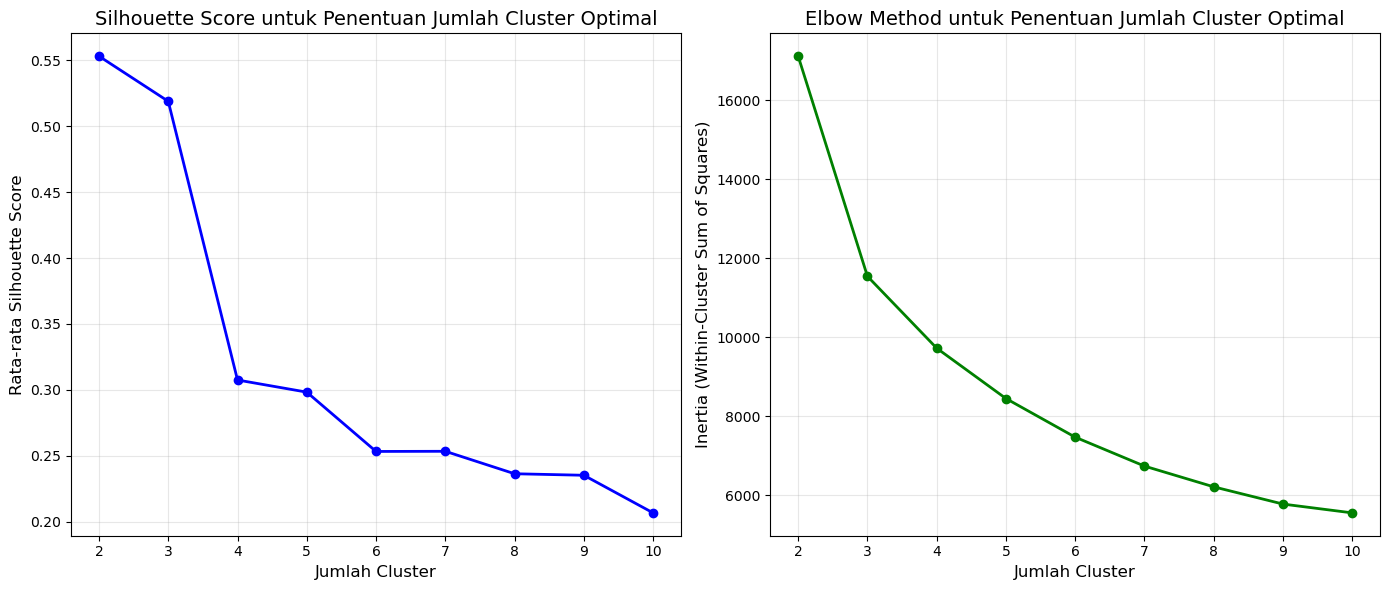


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [14]:
# Evaluasi berbagai nilai K (2-10) untuk menentukan jumlah cluster optimal
range_n_clusters = range(2, 11)
silhouette_avg_scores = []
inertia_scores = []

# Create a copy of df_cluster_numeric for clustering
# Check which columns exist before dropping



for n_clusters in range_n_clusters:
    # Inisialisasi KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    
    # Fit model dan prediksi cluster
    cluster_labels = kmeans.fit_predict(df_cluster_numeric)
    
    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(df_cluster_numeric, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    
    # Inertia untuk Elbow Method
    inertia_scores.append(kmeans.inertia_)
    
    print(f"Untuk n_clusters = {n_clusters}, silhouette score = {silhouette_avg:.3f}, inertia = {kmeans.inertia_:.0f}")

# Visualisasi hasil evaluasi
plt.figure(figsize=(14, 6))

# Plot Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_avg_scores, 'o-', color='blue', linewidth=2)
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('Rata-rata Silhouette Score', fontsize=12)
plt.title('Silhouette Score untuk Penentuan Jumlah Cluster Optimal', fontsize=14)
plt.grid(True, alpha=0.3)

# Plot Elbow Method
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, inertia_scores, 'o-', color='green', linewidth=2)
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method untuk Penentuan Jumlah Cluster Optimal', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tentukan jumlah cluster optimal berdasarkan silhouette score tertinggi
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

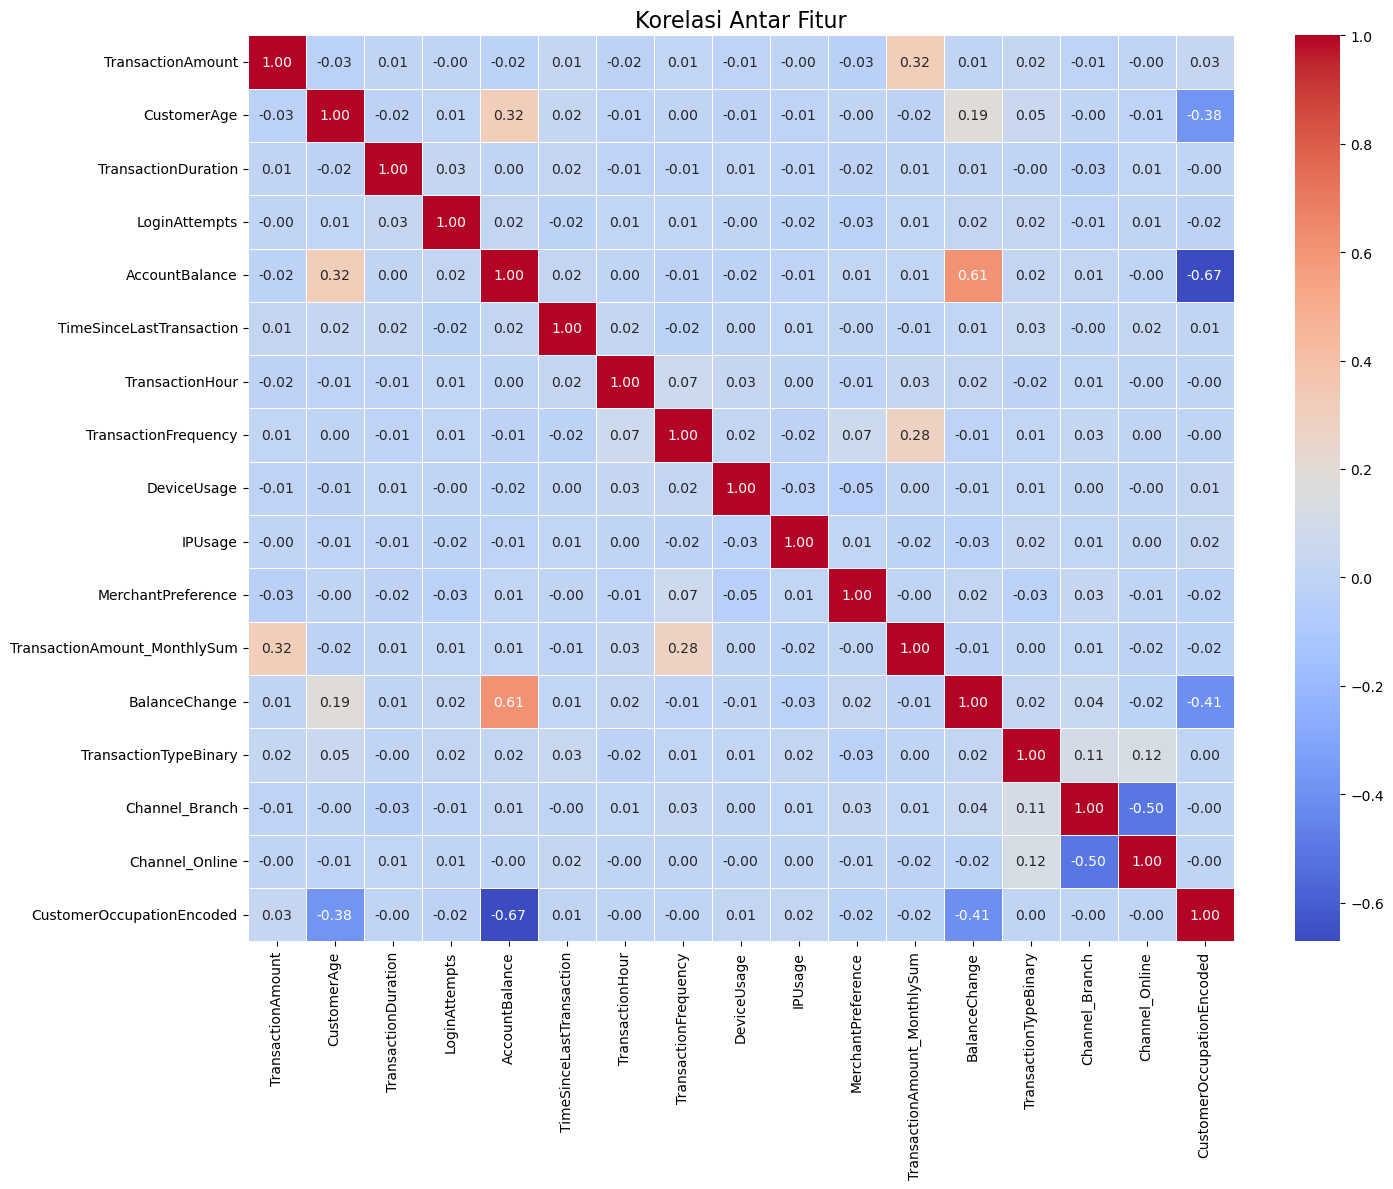

Pasangan fitur dengan korelasi > 0.8:
Tidak ada pasangan fitur dengan korelasi tinggi.

Variance setiap fitur (dari tertinggi ke terendah):


TransactionAmount_MonthlySum    14.335679
CustomerOccupationEncoded        1.276811
Channel_Branch                   0.226384
Channel_Online                   0.218821
TransactionTypeBinary            0.175292
TransactionHour                  0.133746
TimeSinceLastTransaction         0.085348
CustomerAge                      0.082529
AccountBalance                   0.068579
TransactionDuration              0.058275
DeviceUsage                      0.051862
MerchantPreference               0.049787
TransactionFrequency             0.041878
BalanceChange                    0.029876
IPUsage                          0.028981
TransactionAmount                0.025400
LoginAttempts                    0.022481
dtype: float64


Variance explained ratio: [0.84807623 0.07842524]
Total explained variance: 0.9265

Kontribusi fitur terhadap komponen utama:


,Feature,Kontribusi_PC1,Kontribusi_PC2,Total_Kontribusi
11,TransactionAmount_MonthlySum,0.999762,0.006633,1.006395
16,CustomerOccupationEncoded,0.006848,0.980069,0.986917
4,AccountBalance,0.001016,0.158163,0.159180
1,CustomerAge,0.001273,0.100876,0.102148
12,BalanceChange,0.000545,0.064428,0.064972
0,TransactionAmount,0.013275,0.005100,0.018374
7,TransactionFrequency,0.015258,0.001023,0.016281
10,MerchantPreference,0.000233,0.004781,0.005014
9,IPUsage,0.000954,0.002667,0.003621
14,Channel_Branch,0.001659,0.001909,0.003568



Top 5 fitur berdasarkan PCA: ['TransactionAmount_MonthlySum', 'CustomerOccupationEncoded', 'AccountBalance', 'CustomerAge', 'BalanceChange']


In [15]:
# Type your code here
# FEATURE SELECTION SETELAH PREPROCESSING

# 1. Gunakan hanya fitur numerik untuk analisis korelasi
df_cluster_corr = df_cluster_numeric.copy()  # Gunakan df_cluster_numeric yang sudah dibuat sebelumnya

# Periksa korelasi antar fitur
correlation_matrix = df_cluster_corr.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Identifikasi fitur yang berkorelasi tinggi (threshold > 0.8)
corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print(f"Pasangan fitur dengan korelasi > {corr_threshold}:")
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"- {pair[0]} dan {pair[1]}: {pair[2]:.3f}")
else:
    print("Tidak ada pasangan fitur dengan korelasi tinggi.")

# 3. ANALISIS VARIANCE
# Hitung variance untuk setiap fitur numerik
feature_variances = df_cluster_corr.var().sort_values(ascending=False)
print("\nVariance setiap fitur (dari tertinggi ke terendah):")
display(feature_variances)

# 4. PCA untuk reduksi dimensi
from sklearn.decomposition import PCA

# Gunakan hanya kolom numerik untuk PCA
pca = PCA(n_components=2)  # Reduksi ke 2 komponen untuk visualisasi
pca_result = pca.fit_transform(df_cluster_corr)

# Variance explained oleh setiap komponen
print(f"\nVariance explained ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Kontribusi setiap fitur terhadap komponen utama
feature_importance = pd.DataFrame(
    {'Feature': df_cluster_corr.columns,
     'Kontribusi_PC1': np.abs(pca.components_[0]),
     'Kontribusi_PC2': np.abs(pca.components_[1])
    })
feature_importance['Total_Kontribusi'] = feature_importance['Kontribusi_PC1'] + feature_importance['Kontribusi_PC2']
feature_importance = feature_importance.sort_values(by='Total_Kontribusi', ascending=False)

print("\nKontribusi fitur terhadap komponen utama:")
display(feature_importance)

# Pilih fitur berdasarkan PCA dan variance
top_features = feature_importance['Feature'].tolist()[:5]
print(f"\nTop 5 fitur berdasarkan PCA: {top_features}")

# Membuat DataFrame hasil PCA untuk visualisasi
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Visualisasi hasil PCA
final_df = df_cluster_corr[top_features[:5]]  # Ambil 5 fitur teratas

# Fit K-means pada fitur terpilih
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(final_df)





## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

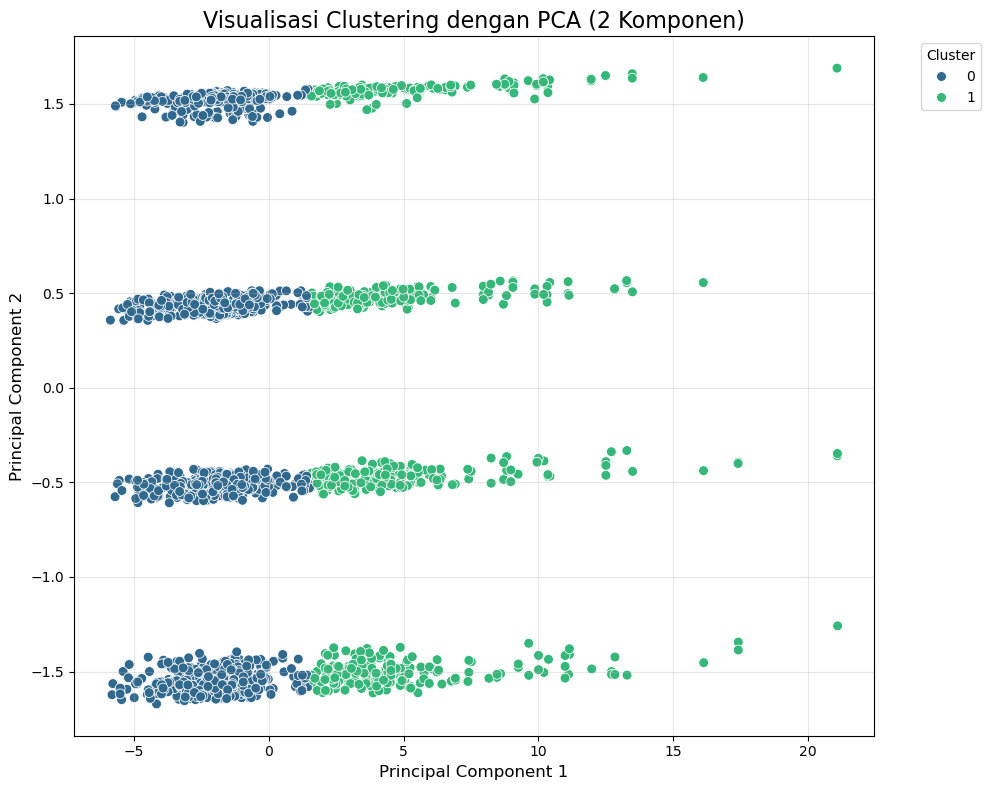


Silhouette score dengan fitur terpilih: 0.6088


In [ ]:
# FEATURE SELECTION SETELAH PREPROCESSING
final_df = df_cluster_corr[top_features[:5]]  # Ambil 5 fitur teratas

# Fit K-means pada fitur terpilih
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(final_df)

# PCA harus diaplikasikan pada data yang sama dengan yang digunakan untuk clustering
# Jadi kita train PCA baru khusus untuk final_df
pca_final = PCA(n_components=2)
pca_result_final = pca_final.fit_transform(final_df)

# Membuat DataFrame hasil PCA untuk visualisasi
pca_df = pd.DataFrame(pca_result_final, columns=['PC1', 'PC2'])
pca_df['cluster'] = final_labels


# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Visualisasi Clustering dengan PCA (2 Komponen)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Hitung silhouette score untuk fitur terpilih
silhouette_selected = silhouette_score(final_df, final_labels)
print(f"\nSilhouette score dengan fitur terpilih: {silhouette_selected:.4f}")


Statistik deskriptif per cluster:


TransactionAmount                                         CustomerAge  \
                     mean    median       min       max       std        mean   
Cluster                                                                         
0                0.662852  0.693158  0.171857  0.993592  0.164897    0.430403   
1                0.704049  0.719970  0.203039  1.000000  0.140415    0.428510   

                                       ... TransactionFrequency            \
           median  min  max       std  ...                 mean    median   
Cluster                                ...                                  
0        0.451613  0.0  1.0  0.285796  ...             0.433551  0.454545   
1        0.411290  0.0  1.0  0.291170  ...             0.541869  0.545455   

                                 TimeSinceLastTransaction                      \
              min  max       std                     mean    median       min   
Cluster                                                                         
0        0.000000  1.0  0.200314                 0.505561  0.519097  0.000000   
1        0.090909  1.0  0.194784                 0.503463  0.505540  0.000002   

                            
             max       std  
Cluster                     
0        1.00000  0.292550  
1        0.99177  0.291318  

[2 rows x 25 columns]

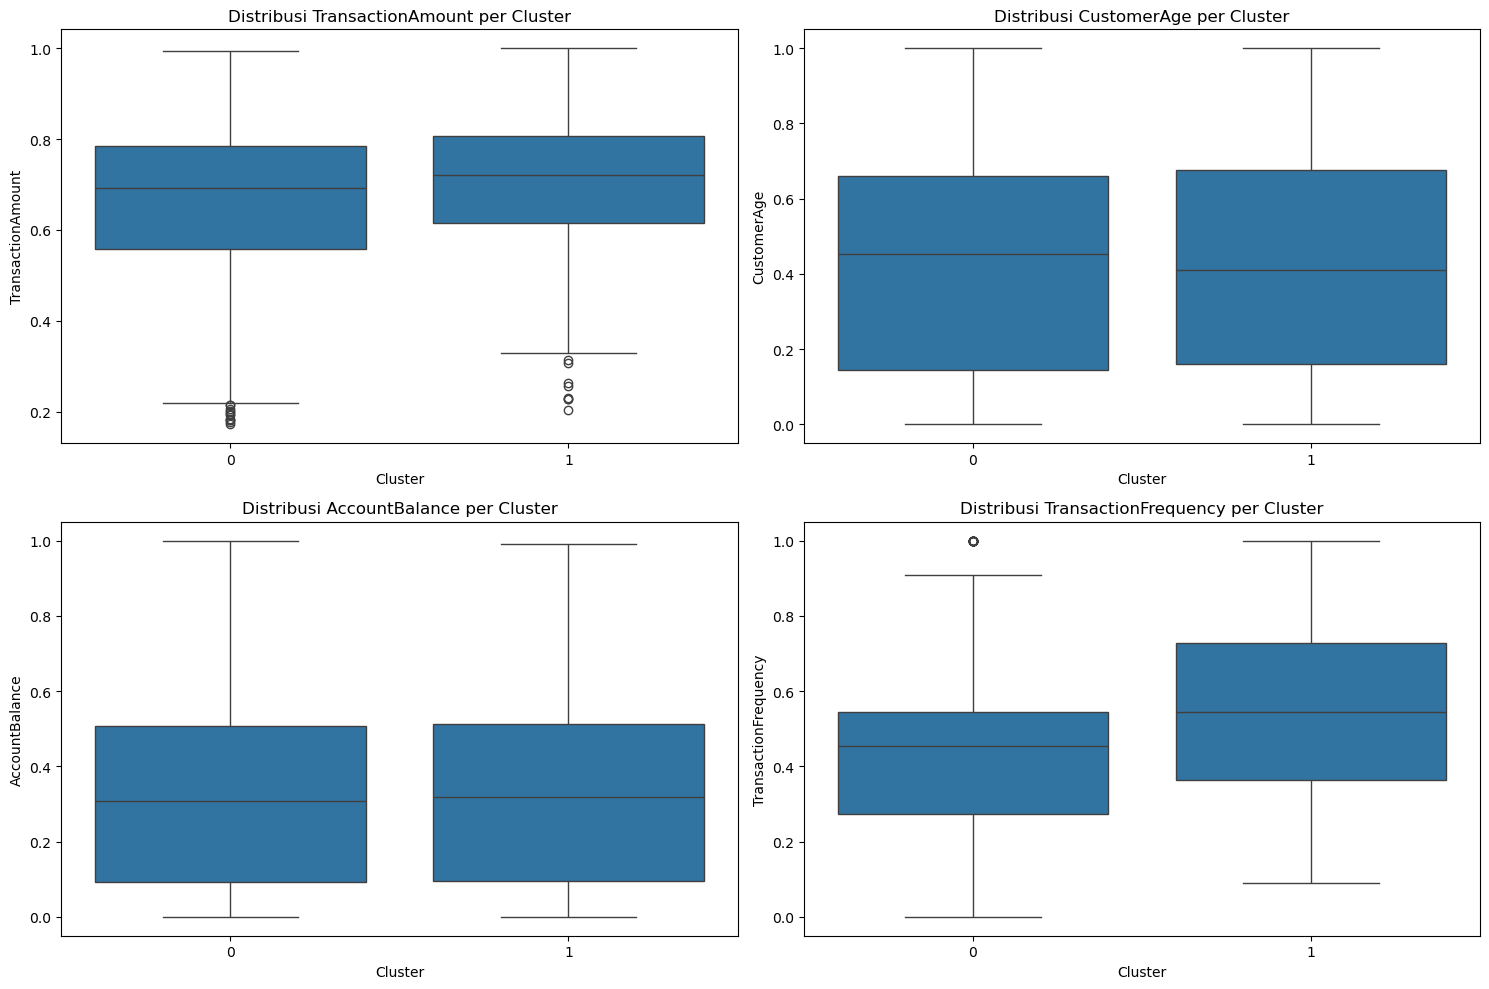


Interpretasi hasil clustering:

Cluster 0:
Jumlah data: 1784
Rata-rata TransactionAmount: 0.66
Rata-rata CustomerAge: 0.43
Rata-rata AccountBalance: 0.33
Rata-rata TransactionFrequency: 0.43
Rata-rata TimeSinceLastTransaction: 0.51

Cluster 1:
Jumlah data: 710
Rata-rata TransactionAmount: 0.70
Rata-rata CustomerAge: 0.43
Rata-rata AccountBalance: 0.34
Rata-rata TransactionFrequency: 0.54
Rata-rata TimeSinceLastTransaction: 0.50


In [17]:
# Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia

# Tambahkan label cluster ke DataFrame asli

df_cluster['Cluster'] = final_labels

# Hitung statistik deskriptif untuk setiap cluster
cluster_summary = df_cluster.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max', 'std'],
    'CustomerAge': ['mean', 'median', 'min', 'max', 'std'],
    'AccountBalance': ['mean', 'median', 'min', 'max', 'std'],
    'TransactionFrequency': ['mean', 'median', 'min', 'max', 'std'],
    'TimeSinceLastTransaction': ['mean', 'median', 'min', 'max', 'std']
})

print("Statistik deskriptif per cluster:")
display(cluster_summary)

# Visualisasi distribusi fitur dalam setiap cluster
plt.figure(figsize=(15, 10))

# Distribusi TransactionAmount per cluster
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='TransactionAmount', data=df_cluster)
plt.title('Distribusi TransactionAmount per Cluster')

# Distribusi CustomerAge per cluster
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='CustomerAge', data=df_cluster)
plt.title('Distribusi CustomerAge per Cluster')

# Distribusi AccountBalance per cluster
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='AccountBalance', data=df_cluster)
plt.title('Distribusi AccountBalance per Cluster')

# Distribusi TransactionFrequency per cluster
plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='TransactionFrequency', data=df_cluster)
plt.title('Distribusi TransactionFrequency per Cluster')

plt.tight_layout()
plt.show()

# Visualisasi distribusi kategorikal per cluster (jika ada)
if 'CustomerOccupation' in df_cluster.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Cluster', hue='CustomerOccupation', data=df_cluster)
    plt.title('Distribusi CustomerOccupation per Cluster')
    plt.legend(title='CustomerOccupation', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

if 'TransactionType' in df_cluster.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Cluster', hue='TransactionType', data=df_cluster)
    plt.title('Distribusi TransactionType per Cluster')
    plt.legend(title='TransactionType', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Interpretasi hasil clustering
print("\nInterpretasi hasil clustering:")
for cluster in df_cluster['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    print(f"Jumlah data: {len(cluster_data)}")
    print(f"Rata-rata TransactionAmount: {cluster_data['TransactionAmount'].mean():.2f}")
    print(f"Rata-rata CustomerAge: {cluster_data['CustomerAge'].mean():.2f}")
    print(f"Rata-rata AccountBalance: {cluster_data['AccountBalance'].mean():.2f}")
    print(f"Rata-rata TransactionFrequency: {cluster_data['TransactionFrequency'].mean():.2f}")
    print(f"Rata-rata TimeSinceLastTransaction: {cluster_data['TimeSinceLastTransaction'].mean():.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [18]:
# INVERSE TRANSFORM UNTUK FITUR YANG SUDAH DIPROSES

# Buat DataFrame baru untuk menyimpan hasil inverse transform
df_inverse = pd.DataFrame()

# 1. Menambahkan hasil label cluster ke DataFrame
df_inverse['Cluster'] = final_labels  # Gunakan hasil clustering yang sudah dilakukan sebelumnya

# 2. Inverse transform untuk fitur yang sudah di-scaled dengan MinMaxScaler
# Ambil fitur numerik yang telah di-scaling sebelumnya
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
                      'AccountBalance', 'BalanceChange', 'TimeSinceLastTransaction', 'TransactionHour',
                      'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference']

# Inverse transform fitur numerik
df_inverse_numerical = pd.DataFrame(
    scaler.inverse_transform(df_cluster[numerical_features]),
    columns=numerical_features,
    index=df_cluster.index
)

# 3. Inverse transform untuk TransactionAmount (yang sebelumnya di-log transform)
df_inverse_numerical['TransactionAmount'] = np.expm1(df_inverse_numerical['TransactionAmount'])

# 4. Inverse transform untuk fitur yang di-encode
# CustomerOccupationEncoded: Label Encoder
df_inverse['CustomerOccupation'] = le.inverse_transform(df_cluster['CustomerOccupationEncoded'].astype(int))

# 5. Inverse transform untuk CustomerAgeGroup (jika diperlukan)
age_mapping = {
    0: '<18',
    1: 'Muda',
    2: 'Dewasa',
    3: 'Paruh Baya', 
    4: 'Senior'
}

if 'CustomerAgeGroup' in df_cluster.columns:
    # Jika CustomerAgeGroup adalah kategorikal
    df_inverse['CustomerAgeGroup'] = df_cluster['CustomerAgeGroup']
    
# 6. Inverse transform TransactionType (0 -> Debit, 1 -> Credit)
if 'TransactionTypeBinary' in df_cluster.columns:
    df_inverse['TransactionType'] = df_cluster['TransactionTypeBinary'].map({0: 'Debit', 1: 'Credit'})

# 7. Gabungkan semua hasil inverse transform
for col in numerical_features:
    df_inverse[col] = df_inverse_numerical[col]

# 8. Tambahkan columns dari dataset asli yang mungkin diperlukan untuk analisis
# Ambil beberapa kolom penting dari dataset asli (df)
original_cols = ['AccountID', 'TransactionID', 'Location', 'MerchantID']
for col in original_cols:
    if col in df.columns:
        df_inverse[col] = df.loc[df_cluster.index, col].values

# 9. Tampilkan hasil inverse transform
print("Hasil Inverse Transform (5 baris pertama):")
display(df_inverse.head())

# 10. Simpan hasil ke dalam DataFrame baru untuk analisis lanjutan
df_results = df_inverse.copy()

# Hitung statistik deskriptif per cluster
cluster_stats = df_results.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max', 'count'],
    'CustomerAge': ['mean', 'median'],
    'AccountBalance': ['mean', 'median'],
    'TransactionFrequency': ['mean', 'median'],
    'TimeSinceLastTransaction': ['mean', 'median']
})

print("\nStatistik Deskriptif Per Cluster:")
display(cluster_stats)

# Hitung distribusi kategori per cluster
if 'CustomerOccupation' in df_results.columns:
    occupation_distribution = pd.crosstab(
        df_results['Cluster'], 
        df_results['CustomerOccupation'], 
        normalize='index'
    )
    
    print("\nDistribusi CustomerOccupation Per Cluster:")
    display(occupation_distribution)

if 'TransactionType' in df_results.columns:
    transaction_type_dist = pd.crosstab(
        df_results['Cluster'], 
        df_results['TransactionType'], 
        normalize='index'
    )
    
    print("\nDistribusi TransactionType Per Cluster:")
    display(transaction_type_dist)

Hasil Inverse Transform (5 baris pertama):


,Cluster,CustomerOccupation,CustomerAgeGroup,TransactionType,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,BalanceChange,TimeSinceLastTransaction,TransactionHour,TransactionFrequency,DeviceUsage,IPUsage,MerchantPreference,AccountID,TransactionID,Location,MerchantID
0,0,Doctor,Senior,Debit,14.09,70.0,81.0,1.0,5112.21,0.0,-49477134.0,16.0,7.0,6.0,3.0,1.0,AC00128,TX000001,San Diego,M015
1,1,Doctor,Senior,Debit,376.24,68.0,141.0,1.0,13758.91,0.0,-42823516.0,16.0,7.0,5.0,4.0,1.0,AC00455,TX000002,Houston,M052
2,0,Student,Muda,Debit,126.29,19.0,56.0,1.0,1122.35,0.0,-41694656.0,18.0,4.0,5.0,6.0,1.0,AC00019,TX000003,Mesa,M009
3,0,Student,Muda,Debit,184.50,26.0,25.0,1.0,8569.06,0.0,-47403415.0,16.0,8.0,6.0,8.0,1.0,AC00070,TX000004,Raleigh,M002
4,0,Student,Muda,Credit,13.45,26.0,198.0,1.0,7429.40,0.0,-33228915.0,17.0,6.0,3.0,4.0,1.0,AC00411,TX000005,Atlanta,M091



Statistik Deskriptif Per Cluster:


TransactionAmount                               CustomerAge         \
                     mean   median   min      max count        mean median   
Cluster                                                                      
0              284.083290  201.610  3.44  1831.02  1784   44.684978   46.0   
1              339.045268  245.605  4.58  1919.11   710   44.567606   43.5   

        AccountBalance          TransactionFrequency         \
                  mean   median                 mean median   
Cluster                                                       
0          5072.158795  4665.29             5.769058    6.0   
1          5175.175493  4851.37             6.960563    7.0   

        TimeSinceLastTransaction              
                            mean      median  
Cluster                                       
0                  -4.212854e+07 -41702712.5  
1                  -4.219453e+07 -42129185.5


Distribusi CustomerOccupation Per Cluster:


CustomerOccupation,Doctor,Engineer,Retired,Student
Cluster,,,,
0,0.247197,0.243274,0.241592,0.267937
1,0.259155,0.261972,0.229577,0.249296



Distribusi TransactionType Per Cluster:


TransactionType,Credit,Debit
Cluster,,
0,0.226457,0.773543
1,0.226761,0.773239


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [19]:
# INVERSE TRANSFORM DATA SETELAH NORMALISASI/STANDARDISASI

# 1. Buat DataFrame untuk hasil akhir dengan klaster
df_result = pd.DataFrame()
df_result['Cluster'] = final_labels

# 2. Inverse transform untuk fitur numerik yang di-scale dengan MinMaxScaler
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
                     'AccountBalance', 'BalanceChange', 'TimeSinceLastTransaction', 'TransactionHour',
                     'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference']

# Pastikan hanya menggunakan fitur yang ada dalam df_cluster
available_num_features = [col for col in numerical_features if col in df_cluster.columns]

if available_num_features:
    # Inverse transform untuk fitur numerik
    inverted_numerical = pd.DataFrame(
        scaler.inverse_transform(df_cluster[available_num_features]),
        columns=available_num_features,
        index=df_cluster.index
    )
    
    # Tambahkan ke df_result
    for col in available_num_features:
        df_result[col] = inverted_numerical[col]
    
    # Khusus untuk TransactionAmount, reverse log transformation
    if 'TransactionAmount' in available_num_features:
        df_result['TransactionAmount'] = np.expm1(df_result['TransactionAmount'])

# 3. Inverse transform untuk fitur kategorikal yang di-encode
# a. CustomerOccupation (Label Encoder)
if 'CustomerOccupationEncoded' in df_cluster.columns:
    df_result['CustomerOccupation'] = le.inverse_transform(df_cluster['CustomerOccupationEncoded'].astype(int))

# b. TransactionType (Binary: 0=Debit, 1=Credit)
if 'TransactionTypeBinary' in df_cluster.columns:
    df_result['TransactionType'] = df_cluster['TransactionTypeBinary'].map({0: 'Debit', 1: 'Credit'})

# 4. Kembalikan CustomerAgeGroup ke bentuk kategori
if 'CustomerAgeGroup' in df_cluster.columns:
    df_result['CustomerAgeGroup'] = df_cluster['CustomerAgeGroup']

# 5. Tambahkan kolom dari dataset asli yang mungkin berguna
original_cols = ['AccountID', 'TransactionID', 'Location', 'MerchantID']
for col in original_cols:
    if col in df.columns:
        # Ambil dari indeks yang sama dengan df_cluster
        df_result[col] = df.loc[df_cluster.index, col].values

# 6. Tampilkan hasil
print("Data setelah inverse transform (5 baris pertama):")
display(df_result.head())

Data setelah inverse transform (5 baris pertama):


,Cluster,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,BalanceChange,TimeSinceLastTransaction,TransactionHour,TransactionFrequency,DeviceUsage,IPUsage,MerchantPreference,CustomerOccupation,TransactionType,CustomerAgeGroup,AccountID,TransactionID,Location,MerchantID
0,0,14.09,70.0,81.0,1.0,5112.21,0.0,-49477134.0,16.0,7.0,6.0,3.0,1.0,Doctor,Debit,Senior,AC00128,TX000001,San Diego,M015
1,1,376.24,68.0,141.0,1.0,13758.91,0.0,-42823516.0,16.0,7.0,5.0,4.0,1.0,Doctor,Debit,Senior,AC00455,TX000002,Houston,M052
2,0,126.29,19.0,56.0,1.0,1122.35,0.0,-41694656.0,18.0,4.0,5.0,6.0,1.0,Student,Debit,Muda,AC00019,TX000003,Mesa,M009
3,0,184.50,26.0,25.0,1.0,8569.06,0.0,-47403415.0,16.0,8.0,6.0,8.0,1.0,Student,Debit,Muda,AC00070,TX000004,Raleigh,M002
4,0,13.45,26.0,198.0,1.0,7429.40,0.0,-33228915.0,17.0,6.0,3.0,4.0,1.0,Student,Credit,Muda,AC00411,TX000005,Atlanta,M091


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

## Analisis dan Interpretasi Visualisasi Clustering dengan PCA

Berdasarkan visualisasi hasil clustering dengan PCA yang Anda lampirkan, berikut adalah analisis dan interpretasinya:

### Analisis Visualisasi PCA

#### Distribusi Data dalam Ruang PCA:
- Data diproyeksikan ke dalam dua dimensi utama (PC1 dan PC2) yang menjelaskan sebagian besar varians dalam data.
- Titik-titik data dikelompokkan ke dalam dua cluster yang berbeda, ditandai dengan warna biru (Cluster 0) dan hijau (Cluster 1).


### Interpretasi

#### Pemisahan Berdasarkan Fitur Utama:
- **PC1 (Principal Component 1)**: Menjelaskan sebagian besar varians dalam data. Berdasarkan kontribusi fitur sebelumnya, PC1 kemungkinan besar dipengaruhi oleh TransactionAmount_MonthlySum.
- **PC2 (Principal Component 2)**: Menjelaskan varians tambahan yang tidak dijelaskan oleh PC1. Berdasarkan kontribusi fitur sebelumnya, PC2 kemungkinan besar dipengaruhi oleh CustomerOccupationEncoded.

#### Karakteristik Cluster:
- **Cluster 0 (Biru)**:
  - Titik-titik dalam cluster ini cenderung memiliki nilai yang lebih rendah pada PC1.
  - Ini mungkin menunjukkan bahwa transaksi dalam cluster ini memiliki jumlah transaksi bulanan yang lebih rendah.

- **Cluster 1 (Hijau)**:
  - Titik-titik dalam cluster ini cenderung memiliki nilai yang lebih tinggi pada PC1.
  - Ini mungkin menunjukkan bahwa transaksi dalam cluster ini memiliki jumlah transaksi bulanan yang lebih tinggi.
  - Pola ini menunjukkan pola yang lebih suspicious dikarenakan tidak sesuai dengan pola yang ada dalam cluster 0. 

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

Analisis dan Interpretasi Visualisasi Clustering dengan PCA
Berdasarkan visualisasi hasil clustering dengan PCA yang Anda lampirkan, berikut adalah analisis dan interpretasinya:

Analisis Visualisasi PCA
Distribusi Data dalam Ruang PCA:

Data diproyeksikan ke dalam dua dimensi utama (PC1 dan PC2) yang menjelaskan sebagian besar varians dalam data.
Titik-titik data dikelompokkan ke dalam dua cluster yang berbeda, ditandai dengan warna biru (Cluster 0) dan hijau (Cluster 1).
Centroids:

Centroid dari masing-masing cluster ditandai dengan tanda 'X' merah.
Centroid adalah titik rata-rata dari semua titik dalam cluster tersebut dalam ruang PCA.
Pemisahan Cluster:

Ada pemisahan yang cukup jelas antara dua cluster, meskipun ada beberapa tumpang tindih.
Cluster 0 (biru) dan Cluster 1 (hijau) memiliki distribusi yang berbeda di sepanjang PC1 dan PC2.
Interpretasi
Pemisahan Berdasarkan Fitur Utama:

PC1 (Principal Component 1): Menjelaskan sebagian besar varians dalam data. Berdasarkan kontribusi fitur sebelumnya, PC1 kemungkinan besar dipengaruhi oleh TransactionAmount_MonthlySum.
PC2 (Principal Component 2): Menjelaskan varians tambahan yang tidak dijelaskan oleh PC1. Berdasarkan kontribusi fitur sebelumnya, PC2 kemungkinan besar dipengaruhi oleh CustomerOccupationEncoded.
Karakteristik Cluster:

Cluster 0 (Biru):
Titik-titik dalam cluster ini cenderung memiliki nilai yang lebih rendah pada PC1.
Ini mungkin menunjukkan bahwa transaksi dalam cluster ini memiliki jumlah transaksi bulanan yang lebih rendah.
Cluster 1 (Hijau):
Titik-titik dalam cluster ini cenderung memiliki nilai yang lebih tinggi pada PC1.
Ini mungkin menunjukkan bahwa transaksi dalam cluster ini memiliki jumlah transaksi bulanan yang lebih tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [21]:
# **7. Mengeksport Data**

# Pastikan DataFrame df_clustered sudah berisi data yang di-cluster
# df_clustered['Cluster'] sudah ada dari langkah sebelumnya

# Export DataFrame ke file CSV
output_file_path = 'clustered_data.csv'
df_cluster.to_csv(output_file_path, index=False)

print(f"Data berhasil diekspor ke {output_file_path}")

Data berhasil diekspor ke clustered_data.csv
